# 反爬：驗證碼處理

* 了解「驗證碼機制」的反爬蟲機制
* 「驗證碼機制」反爬蟲的因應策略


## 作業目標

* 讀讀看「test」資料夾下的圖檔！
* 像 test/test2.png 這種複雜的圖片怎麼辦？


### 讀讀看「test」資料夾下的圖檔！

In [141]:
import requests
import pytesseract
from PIL import Image
from io import BytesIO

In [142]:
from PIL import Image, ImageChops

def getbox(im, color):
    bg = Image.new(im.mode, im.size, color)
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    return diff.getbbox()

def split(im):
    fixImgArr = []
    emptyColor = im.getpixel((0, 0))
    box = getbox(im, emptyColor)
    width, height = im.size
    pixels = im.getdata()
    sub_start = 0
    sub_width = 0
    offset = box[1] * width
    for x in range(width):
        if pixels[x + offset] == emptyColor:
            if sub_width > 0:
                fixImgArr.append((sub_start, box[1], sub_width, box[3]))
                sub_width = 0
            sub_start = x + 1
        else:
            sub_width = x + 1
    if sub_width > 0:
        fixImgArr.append((sub_start, box[1], sub_width, box[3]))
    return fixImgArr

In [143]:
img = Image.open("test/test1.png").convert("L")
code = pytesseract.image_to_string(img)
print(code)


619121


### 像 test/test2.png 這種複雜的圖片怎麼辦？

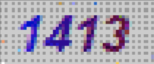

In [158]:
img = Image.open("test/test2.png").convert("L")
img

In [159]:
code = pytesseract.image_to_string(img)
print(code)

1413


In [146]:
import cv2
img = cv2.imread("test/test2.png")
dst = cv2.fastNlMeansDenoisingColored(img,None,40,40,7,21)

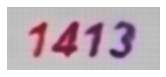

In [147]:
import matplotlib.pyplot as plt
#plt.subplot(121)
#plt.imshow(img)
plt.subplot(122)
plt.imshow(dst)
plt.axis('off')
#plt.figure(figsize=(20,20))
plt.savefig("test/test2_blank.png")

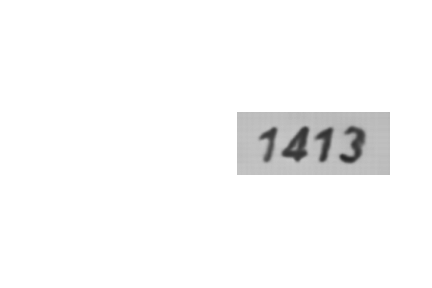

In [148]:
img = Image.open("test/test2_blank.png").convert("L")
code = pytesseract.image_to_string(img)
img

In [149]:
#去除空白
im = Image.open("test/test2_blank.png")

for idx, box in enumerate(split(im)):
    im.crop(box).save("test/test2_fix.png".format(idx))

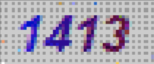

In [157]:
img = Image.open("test/test2.png")
img

In [153]:
code = pytesseract.image_to_string(img)
print(code)

1413
